# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import networkx as nx

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Dataset Overview

## Reading the Dataset

In [3]:
df = pd.read_csv('data/responses.csv')

In [4]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [5]:
df.shape

(1010, 150)

# Data Cleaning

## Checking if there are missing values

In [6]:
df.isnull().sum()

Music                              3
Slow songs or fast songs           2
Dance                              4
Folk                               5
Country                            5
Classical music                    7
Musical                            2
Pop                                3
Rock                               6
Metal or Hardrock                  3
Punk                               8
Hiphop, Rap                        4
Reggae, Ska                        7
Swing, Jazz                        6
Rock n roll                        7
Alternative                        7
Latino                             8
Techno, Trance                     7
Opera                              1
Movies                             6
Horror                             2
Thriller                           1
Comedy                             3
Romantic                           3
Sci-fi                             2
War                                2
Fantasy/Fairy tales                3
A

Drop missing values to clusterize only the ones that are complete and after try to clusterize the missing ones to fill the missing values.

In [7]:
df = df.dropna()

In [8]:
df.shape

(674, 150)

## Any categorical data?

In [9]:
df.select_dtypes('object').head()

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,never smoked,drink a lot,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats
1,never smoked,drink a lot,i am often early,sometimes,few hours a day,female,right handed,college/bachelor degree,no,city,block of flats
2,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
4,tried smoking,social drinker,i am always on time,everytime it suits me,few hours a day,female,right handed,secondary school,no,village,house/bungalow
5,never smoked,never,i am often early,only to avoid hurting someone,few hours a day,male,right handed,secondary school,no,city,block of flats


### Get dummies

In [10]:
columns_categorical = df.select_dtypes('object').columns
columns_categorical

Index(['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
       'Gender', 'Left - right handed', 'Education', 'Only child',
       'Village - town', 'House - block of flats'],
      dtype='object')

In [11]:
df_dummies = []
for column in columns_categorical:
    dummies = pd.get_dummies(df[column], drop_first=True)
    df_dummies.append(dummies)

In [12]:
for i in range(len(df_dummies)):
    df = pd.concat([df, df_dummies[i]], axis=1)

In [13]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,former smoker,never smoked,tried smoking,never,social drinker,i am often early,i am often running late,never,only to avoid hurting someone,sometimes,less than an hour a day,most of the day,male,right handed,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school,yes,village,house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,

In [14]:
df = df.drop(columns=(list(columns_categorical)))

In [15]:
df.shape

(674, 161)

In [16]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,former smoker,never smoked,tried smoking,never,social drinker,i am often early,i am often running late,never,only to avoid hurting someone,sometimes,less than an hour a day,most of the day,male,right handed,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school,yes,village,house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0

# Standardization

# Data Clustering

## Grouping by categories

In [17]:
music = df.iloc[: , :19]
movies = df.iloc[:, 19:31]
hobbies = df.iloc[:, 31:63]
phobias = df.iloc[:, 63:73]
health = df.iloc[:, [73, 139, 140, 141, 142, 143]]
spending_habits = df.iloc[:, 128:135]
demographics = df.iloc[:, [135, 136, 137, 152, 153, 154, 155, 156, 157, 158, 159]]

## Music

### Standardization

In [18]:
scaler = StandardScaler()
music_std = scaler.fit_transform(music)

### How many clusters should I use?

In [19]:
len(music.columns)

19

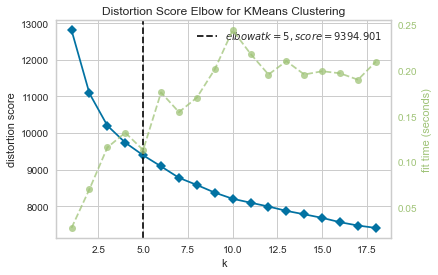

In [20]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,19))

visualizer.fit(music_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Using KMeans

In [30]:
kmeans = KMeans(5)
kmeans.fit(music_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
music['labels'] = kmeans.labels_

In [32]:
pca = PCA(2)
pca.fit(music_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pc1 = pca.transform(music_std)[:, 0]
pc2 = pca.transform(music_std)[:, 1]

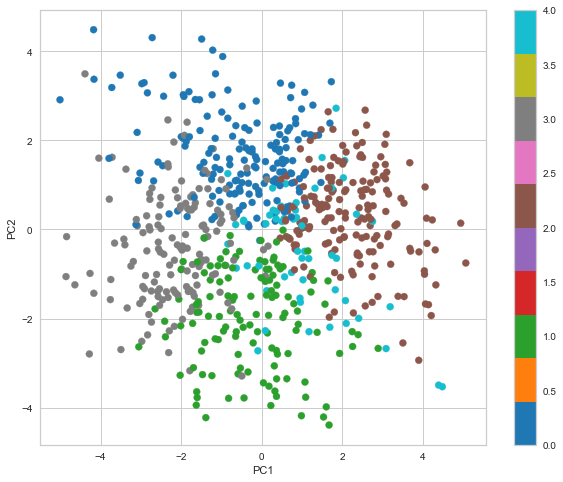

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(pc1, pc2, c=music['labels'], cmap='tab10')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

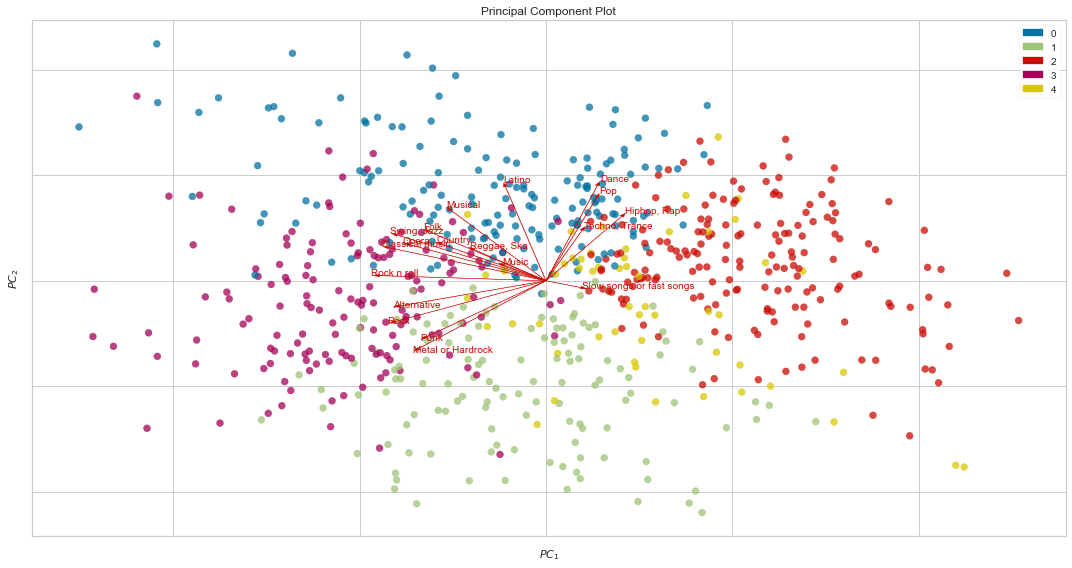

In [35]:
from yellowbrick.features.pca import PCADecomposition

plt.figure(figsize=(15,8))
visualizer = PCADecomposition(scale=True, proj_features=True,)
visualizer.fit_transform(pd.DataFrame(music_std, columns=['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera']), y=music['labels'])
visualizer.show()

In [36]:
kmeans.cluster_centers_

array([[ 0.22817093,  0.12569418,  0.72563356,  0.35775728,  0.23333563,
         0.33220419,  0.56650761,  0.58425348,  0.12698107, -0.23267481,
        -0.09207649,  0.63727721,  0.50431372,  0.55747042,  0.35166413,
         0.02722473,  0.73258117,  0.52629893,  0.24722625],
       [ 0.24171119,  0.29676201, -0.5305585 , -0.47309702, -0.48504268,
        -0.43812161, -0.61766757, -0.54136186,  0.69950488,  0.90486382,
         0.85819447, -0.38572409, -0.07362016, -0.32432608,  0.18879006,
         0.38261669, -0.67034214, -0.17991898, -0.47498523],
       [ 0.22638595,  0.02393419,  0.29681657, -0.46041808, -0.41126072,
        -0.65213398, -0.4192165 ,  0.36327951, -0.89708084, -0.71280335,
        -0.72859358,  0.40375853, -0.3384845 , -0.64460657, -0.790105  ,
        -0.68899204, -0.11397829,  0.12457138, -0.57036171],
       [ 0.21877072, -0.37971263, -0.59042003,  0.64525451,  0.56524403,
         0.88883985,  0.4864737 , -0.54842748,  0.49871578,  0.41925268,
         0.334

## Movies and Music

In [21]:
movies_music = pd.concat([music, movies], axis=1)

### Standardization

In [22]:
scaler = StandardScaler()
movies_music_std = scaler.fit_transform(movies_music) 

### How many clusters should I use?

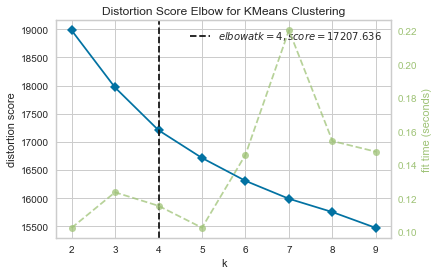

In [23]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(movies_music_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [40]:
kmeans = KMeans(5)
kmeans.fit(movies_music_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
movies_music['labels'] = kmeans.labels_

In [42]:
movies_music.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror',
       'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action',
       'labels'],
      dtype='object')

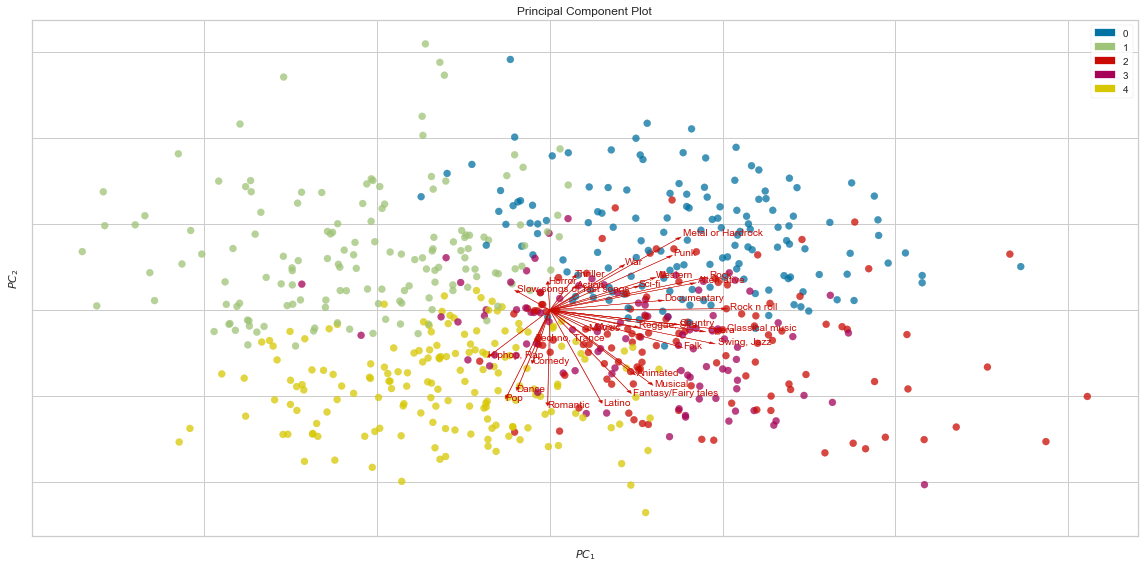

In [44]:
from yellowbrick.features.pca import PCADecomposition

plt.figure(figsize=(16,8))
visualizer = PCADecomposition(scale=True, proj_features=True,)
visualizer.fit_transform(pd.DataFrame(movies_music, columns=['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror',
       'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action']), y=movies_music['labels'])
visualizer.show()

## Hierarchical Clustering

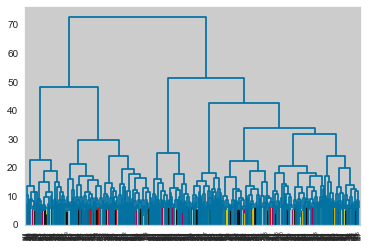

In [207]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(movies_music, method = 'ward'), color_threshold=6)

In [210]:
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical.fit(movies_music)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [212]:
pca = PCA(2)
pca.fit(movies_music_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [213]:
pc1 = pca.transform(movies_music_std)[:, 0]
pc2 = pca.transform(movies_music_std)[:, 1]

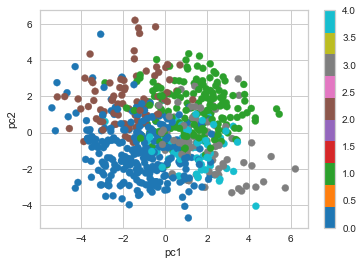

In [216]:
plt.scatter(pc1, pc2, c=hierarchical.labels_, cmap='tab10')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar();

### PCA

In [225]:
pca = PCA()
pca.fit(movies_music_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [227]:
pca.components_

array([[ 7.80508473e-02, -5.79218941e-02, -5.93810221e-02,
         2.36967400e-01,  2.29974384e-01,  3.13525984e-01,
         1.85448512e-01, -7.93186124e-02,  2.82324484e-01,
         2.36406599e-01,  2.19364774e-01, -1.09618124e-01,
         1.57171061e-01,  2.97027502e-01,  3.19151801e-01,
         2.61425309e-01,  9.38897937e-02, -2.49477519e-02,
         2.78979057e-01,  6.73790751e-02, -3.53805440e-03,
         4.48604941e-02, -3.12387649e-02, -4.02389594e-03,
         1.57428293e-01,  1.32126903e-01,  1.46450821e-01,
         1.52795380e-01,  2.01867787e-01,  1.88274599e-01,
         4.56659593e-02],
       [-6.79746778e-02,  6.66265027e-02, -2.90379503e-01,
        -1.35261341e-01, -5.25120974e-02, -7.22695525e-02,
        -2.73155057e-01, -3.21236374e-01,  1.19153766e-01,
         2.66298393e-01,  1.97903576e-01, -1.67719936e-01,
        -6.20742845e-02, -1.22635361e-01,  4.85122678e-03,
         9.84179669e-02, -3.39312701e-01, -1.07587764e-01,
        -7.84996097e-02, -7.05

In [228]:
pca.components_[0]

array([ 0.07805085, -0.05792189, -0.05938102,  0.2369674 ,  0.22997438,
        0.31352598,  0.18544851, -0.07931861,  0.28232448,  0.2364066 ,
        0.21936477, -0.10961812,  0.15717106,  0.2970275 ,  0.3191518 ,
        0.26142531,  0.09388979, -0.02494775,  0.27897906,  0.06737908,
       -0.00353805,  0.04486049, -0.03123876, -0.0040239 ,  0.15742829,
        0.1321269 ,  0.14645082,  0.15279538,  0.20186779,  0.1882746 ,
        0.04566596])

In [232]:
pca.explained_variance_ratio_

array([0.13531221, 0.1087662 , 0.08691722, 0.06349496, 0.05027435,
       0.04349106, 0.03836831, 0.03641279, 0.03365411, 0.03176735,
       0.02895502, 0.02747736, 0.02687103, 0.02625267, 0.0245469 ,
       0.02192035, 0.02027348, 0.0198426 , 0.01891133, 0.01720498,
       0.01642463, 0.01595361, 0.01459257, 0.01392964, 0.01341463,
       0.01248575, 0.01219739, 0.01128476, 0.01060724, 0.01048755,
       0.00790793])

In [243]:
pca = PCA(0.8)
pca.fit(movies_music_std)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [244]:
pca.n_components_

17

In [245]:
pca.explained_variance_ratio_

array([0.13531221, 0.1087662 , 0.08691722, 0.06349496, 0.05027435,
       0.04349106, 0.03836831, 0.03641279, 0.03365411, 0.03176735,
       0.02895502, 0.02747736, 0.02687103, 0.02625267, 0.0245469 ,
       0.02192035, 0.02027348])

# Case - Subway

- Healthy fast food  
- Target audience: young indivduals  
- Save time  
- Low cost  

In [165]:
sub = pd.concat([health[['Healthy eating']], hobbies[['Countryside, outdoors', 'Passive sport', 'Active sport', 'Adrenaline sports']], df[['Eating to survive']], spending_habits[['Spending on healthy eating']]], axis=1)

In [166]:
scaler = StandardScaler()
movies_std = scaler.fit_transform(sub) 

In [167]:
kmeans = KMeans(2)
kmeans.fit(sub)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [168]:
sub['labels'] = kmeans.labels_

In [169]:
sub.columns

Index(['Healthy eating', 'Countryside, outdoors', 'Passive sport',
       'Active sport', 'Adrenaline sports', 'Eating to survive',
       'Spending on healthy eating', 'labels'],
      dtype='object')

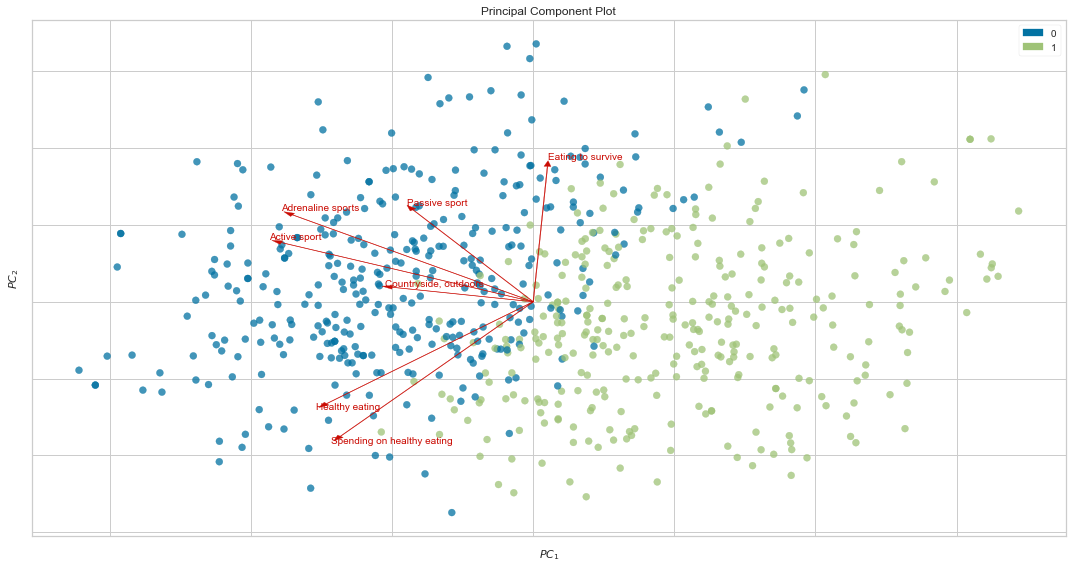

In [170]:
from yellowbrick.features.pca import PCADecomposition

plt.figure(figsize=(15,8))
visualizer = PCADecomposition(scale=True, proj_features=True,)
visualizer.fit_transform(pd.DataFrame(sub, columns=['Healthy eating', 'Countryside, outdoors', 'Passive sport',
       'Active sport', 'Adrenaline sports', 'Eating to survive',
       'Spending on healthy eating']), y=sub['labels'])
visualizer.show()

In [172]:
sub.head()

,Healthy eating,"Countryside, outdoors",Passive sport,Active sport,Adrenaline sports,Eating to survive,Spending on healthy eating,labels
0,4.0,5.0,1.0,5.0,4.0,1,3.0,0
1,3.0,1.0,1.0,1.0,2.0,1,2.0,1
2,3.0,5.0,5.0,2.0,5.0,5,2.0,0
4,4.0,4.0,3.0,1.0,2.0,1,4.0,1
5,2.0,5.0,5.0,4.0,3.0,2,4.0,0


Cluster 0 - Health eating, sports people  
Cluster 1 - Non-health eating, non-sports people